In [1]:
!conda install -c conda-forge pandas pandas-profiling matplotlib openpyxl -y

Solving environment: done

# All requested packages already installed.



In [2]:
#pip install pandas-profiling

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

In [4]:
df = pd.read_csv('clean_churn_data.csv',index_col='Unnamed: 0')

In [5]:
df

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Box_Cox,TotalCharges_Transform,Tenuresqrt/TotalCharges_Ratio,TotalChargeslog/MonthlyCharges_Ratio,MonthlyCharges/TotalCharges_Ratio
0,7590-VHVEG,1,0,0,0,29.85,29.85,0,5.399287,-1.812552,0.294448,1.608721,8.789274
1,5575-GNVDE,34,1,1,1,56.95,1889.50,0,22.900956,0.254068,0.772919,10.753714,7.548978
2,3668-QPYBK,2,1,0,1,53.85,108.15,1,9.018523,-1.385188,0.301955,2.608879,11.497764
3,7795-CFOCW,45,0,1,2,42.30,1840.75,0,22.722905,0.233044,0.892294,11.456983,5.626550
4,9237-HQITU,2,1,0,0,70.70,151.65,1,10.182711,-1.247719,0.281627,2.891812,14.079247
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,1,1,1,84.80,1990.50,0,23.259217,0.296372,0.644930,10.047759,11.163563
7039,2234-XADUH,72,1,1,3,103.20,7362.90,0,34.010528,1.565901,0.952952,18.506248,11.590024
7040,4801-JZAZL,11,0,0,0,29.60,346.45,0,13.487726,-0.857458,0.567164,5.494217,5.061786
7041,8361-LTMKD,4,1,0,1,74.40,306.60,1,12.953998,-0.920482,0.349312,4.063157,12.994399


In [6]:
df.isna().sum()

customerID                              0
tenure                                  0
PhoneService                            0
Contract                                0
PaymentMethod                           0
MonthlyCharges                          0
TotalCharges                            0
Churn                                   0
Box_Cox                                 0
TotalCharges_Transform                  0
Tenuresqrt/TotalCharges_Ratio           0
TotalChargeslog/MonthlyCharges_Ratio    0
MonthlyCharges/TotalCharges_Ratio       0
dtype: int64

In [7]:
X = df.drop(["customerID", "Box_Cox", "TotalCharges", "Tenuresqrt/TotalCharges_Ratio","TotalChargeslog/MonthlyCharges_Ratio", "MonthlyCharges/TotalCharges_Ratio"], axis = "columns", inplace = True)

In [8]:
#X = df.drop(["customerID", "Box_Cox"], axis = "columns", inplace = True)
#Wanted to see what would happen if I left the ratios in. There really wansn't much of a difference so I decided to take them out.

In [9]:
df

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,Churn,TotalCharges_Transform
0,1,0,0,0,29.85,0,-1.812552
1,34,1,1,1,56.95,0,0.254068
2,2,1,0,1,53.85,1,-1.385188
3,45,0,1,2,42.30,0,0.233044
4,2,1,0,0,70.70,1,-1.247719
...,...,...,...,...,...,...,...
7038,24,1,1,1,84.80,0,0.296372
7039,72,1,1,3,103.20,0,1.565901
7040,11,0,0,0,29.60,0,-0.857458
7041,4,1,0,1,74.40,1,-0.920482


In [10]:
features = df.drop('Churn', axis=1)
targets = df['Churn']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(features, targets, stratify=targets, random_state=42)

In [12]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [13]:
print(lr_model.score(x_train, y_train))
print(lr_model.score(x_test, y_test))

0.800910125142207
0.7906712172923777


In [14]:
lr_model.predict_proba(x_test)[:5]

array([[0.38103758, 0.61896242],
       [0.97761521, 0.02238479],
       [0.57883794, 0.42116206],
       [0.3020147 , 0.6979853 ],
       [0.88139614, 0.11860386]])

In [15]:
lr_model.predict(x_test)[:5]

array([1, 0, 0, 1, 0])

<AxesSubplot:xlabel='predicted_probability', ylabel='Density'>

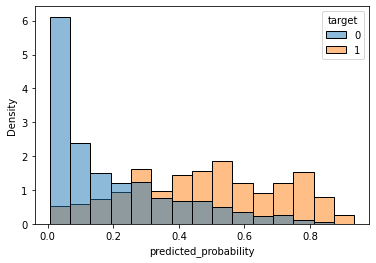

In [16]:
import seaborn as sns
probabilities = lr_model.predict_proba(x_test)[:, 1]
prob_df = pd.DataFrame(data={'predicted_probability': probabilities, 'target': y_test})
sns.histplot(data=prob_df, x='predicted_probability', hue='target', stat='density', common_norm=False)

In [17]:
(lr_model.predict_proba(x_test)[:5, 1] > 0.3).astype('int')

array([1, 0, 1, 1, 0])

In [18]:
predictions_lower_thresh = (lr_model.predict_proba(x_test)[:, 1] > 0.3).astype('int')

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(y_test, predictions_lower_thresh))
tn, fp, fn, tp  = confusion_matrix(y_test, predictions_lower_thresh).flatten()
print(tp / (tp + fn))

0.7525597269624573
0.7516059957173448


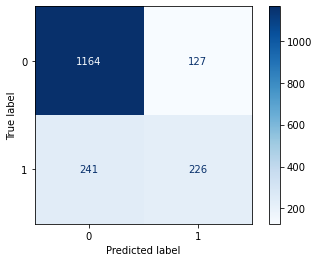

In [20]:
plot_confusion_matrix(lr_model, x_test, y_test, cmap='Blues')

In [21]:
print(features.columns)
print(lr_model.coef_)

Index(['tenure', 'PhoneService', 'Contract', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges_Transform'],
      dtype='object')
[[ 0.01942835 -0.9886039  -1.12299065 -0.16105998  0.05130181 -1.4534574 ]]


<AxesSubplot:>

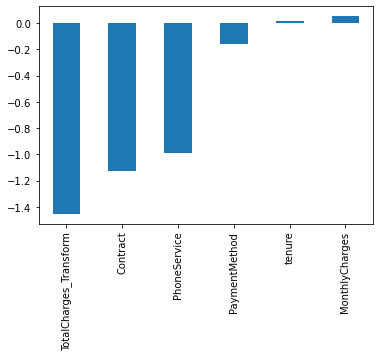

In [22]:
coef_df = pd.DataFrame(data=lr_model.coef_, columns=features.columns)
coef_df.T.sort_values(by=0).plot.bar(legend=False)

To begin I ended up cleaning my data by dropping some variables I didnt need. ["customerID", "Box_Cox", "TotalCharges", "Tenuresqrt/TotalCharges_Ratio","TotalChargeslog/MonthlyCharges_Ratio", "MonthlyCharges/TotalCharges_Ratio"]. I decided to drop these because they didnt really change anything to my end result and they werent useful (I ran everything with and without to see the changes). TotalCharges_Transform was a better fit so I decided to keep that instead of total_charges. After I dropped the variables I let my regression run. My train and test set were very similar with 80% and 79% respectively. I then used the prediction of probabilities chart to see where I should move my threshold. A threshold of 0.3 gave me an accuracy and TPR of 75%. I figured this is the best threshold to have as anything less and my regression would have less accuracy and anything more and I'd have less of a TPR. While I do see the benefit of having more of a TPR over accuracy I would have to drop my accuracy too much before my TPR is noticeably better. If youre looking for churn it would be better to know if a customer may churn even if its not accurate. 

In the pharmacy one of the metrics we look at for store performance is return to stock. Return to stock happens when we return a ready prescription back to our shelf. This usually happens if the prescription hasnt been picked up for 10-14 days. ML could be used in a buisness setting to analyze return to stock by finding what customers are not likely to pick up their medicaitons on time. We may be able to look at factors like age, medication type (maintenance vs short course), cost, insurance type, return to stock history, etc. If a medication has a high likelyhood of being returned we may be able to contact the patient and let them know we will return it so they can come in before we do.   